In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

%matplotlib inline
sns.set(style="whitegrid")

In [4]:
benin = pd.read_csv('../data/benin_clean.csv')
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

benin['Country'] = 'Benin'
sierra_leone['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

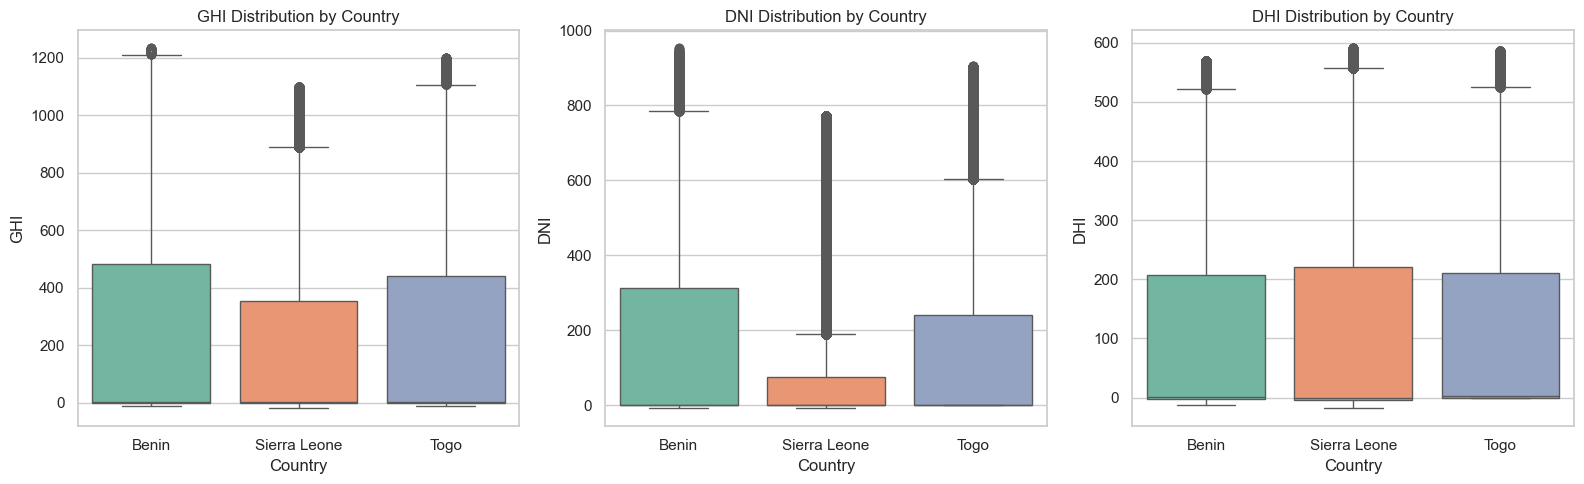

In [5]:
plt.figure(figsize=(16, 5))
for i, var in enumerate(['GHI', 'DNI', 'DHI']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='Country', y=var, hue='Country', palette="Set2", legend=False)
    plt.title(f'{var} Distribution by Country')
plt.tight_layout()
plt.show()

In [6]:


metrics = ['GHI', 'DNI', 'DHI']
summary = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary



GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.34    1.8  330.87  167.19   -0.1  261.71  108.78    1.6   
Sierra Leone  196.44    0.3  291.24  104.53   -0.1  201.70  110.11   -0.1   
Togo          229.83    2.1  321.64  149.37    0.0  248.55  112.41    2.5   

                      
                 std  
Country               
Benin         150.38  
Sierra Leone  154.17  
Togo          151.29

In [7]:
ghi_groups = [benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna()]
anova_result = f_oneway(*ghi_groups)
print(f"ANOVA result: F = {anova_result.statistic:.2f}, p = {anova_result.pvalue:.4f}")

kruskal_result = kruskal(*ghi_groups)
print(f"Kruskal-Wallis result: H = {kruskal_result.statistic:.2f}, p = {kruskal_result.pvalue:.4f}")

ANOVA result: F = 2782.41, p = 0.0000
Kruskal-Wallis result: H = 5142.34, p = 0.0000


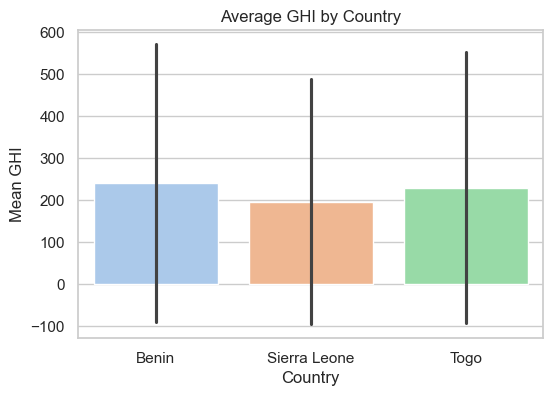

In [8]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Country', y='GHI', estimator='mean', errorbar='sd', hue='Country', palette='pastel', legend=False)
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI')
plt.show()


🔍 Key Observations

    Benin has the highest GHI median.
    Sierra Leone exhibits the lowest solar radiation.
    The differences are statistically significant (p < 0.05).

